# Projet

## Définition du Problème

Le projet consiste à prévoir le nombre de vélos loués à chaque heure dans des bornes libres-services de la ville (système type Vélib'). La variable cible est ici la variable **count**.

## Decription des données
Voici un descriptif de l'ensemble des variables :
* *datetime* - date et heure du relevé 
* *season* - 1 = printemps , 2 = été, 3 = automne, 4 = hiver 
* *holiday* – indique si le jour est un jour de vacances scolaires 
* *workingday* - indique si le jour est travaillé (ni week-end ni vacances) 
* *weather* - 1: Dégagé à nuageux, 2 : Brouillard, 3 : Légère pluie ou neige, 4 : Fortes averses ou neiges 
* *temp* – température en degrés Celsius 
* *atemp* – température ressentie en degrés Celsius 
* *humidity* – taux d’humidité 
* *windspeed* – vitesse du vent 
* *casual* - nombre de locations d’usagers non abonné
* *registered* – nombre de locations d’usagers abonnés 
* *count* – nombre total de locations de vélos 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import matplotlib as mpl
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

%matplotlib inline

## Acquisition des données

In [61]:
df = pd.read_csv("./data/velo.csv")

In [62]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


Nous contatons que nous constatons que toutes nos valeurs sont étiquetées y compris la variable cible. Nous sommes en face d'un **apprentissage supervisé**. La valeur à predire est la variable count qui est un nombre. Il s'agit d'un problème de **regression**


In [63]:
print('Format des données {0}'.format(df.shape))

Format des données (10886, 12)


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Notre de jeu de données ne contient aucune valeur nulle. Verifions ce la avec plus de precision

In [65]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [66]:
df.dtypes.value_counts()

int64      8
float64    3
object     1
dtype: int64

Nous constatons que nous avons une seule variable quatitative, le reste étant numérique

In [67]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


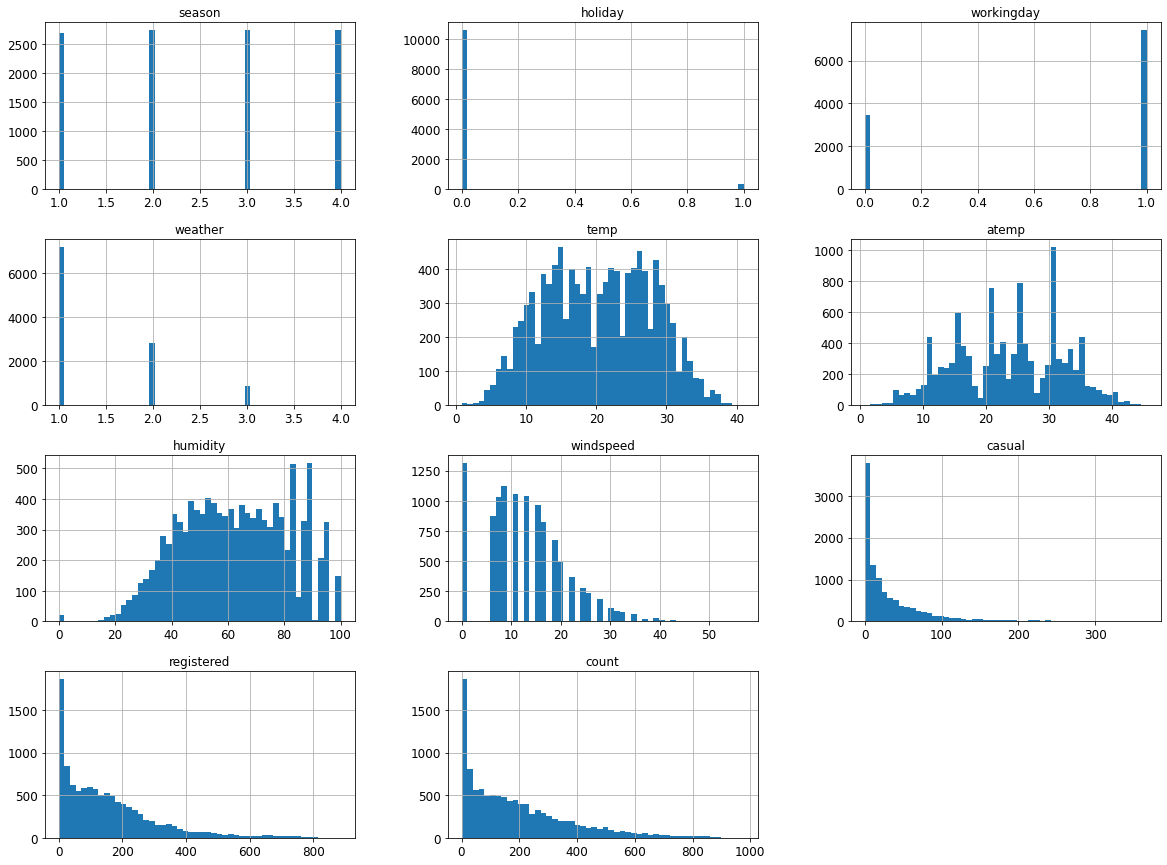

In [68]:
#Observons ce descriptif avec à travers un histogramme

df.hist(bins=50, figsize=(20,15))
plt.show()

Quelques remarques peuvent être faites à partir de cet histogramme:

* Les variables **season**, **holiday**, **workingday** et **weather** sont des features de catégorisation de type ordinal.
* Les données sont beaucoup plus importantes les jours ouvrables.
* Les variables: **windspeed**, **casual**,**registered**,**TotalWorkingYears** sont dissymétriques à gauche, elles s'étendent bien plus à droite de la médiane. Certains algorithmes ont du mal à détecter les structurations dans ces configurations


## Exploration et visualisation des données

In [69]:
data = df.copy()

In [70]:
# Obervons de plus près nos varaibles catégorielles

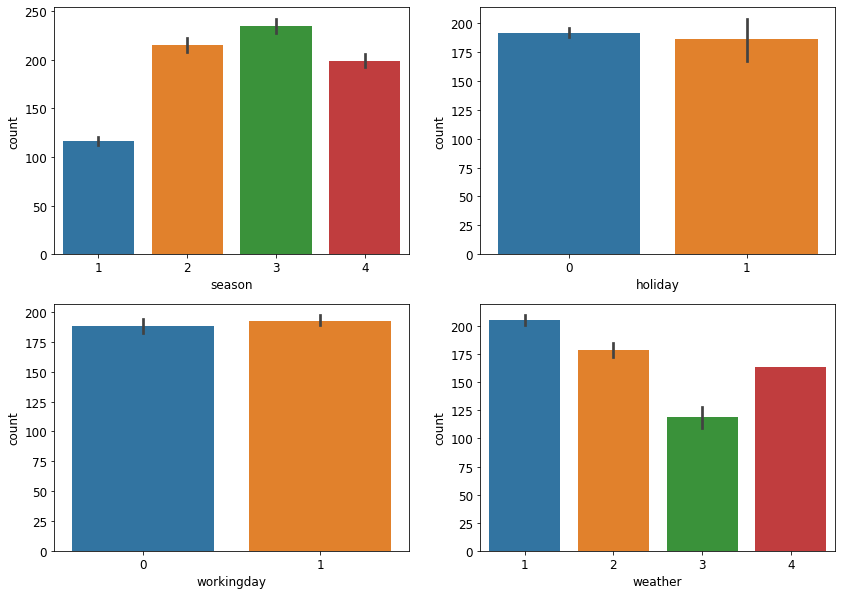

In [71]:
#sns.catplot(x='workingday',data=df,kind='count',height=5,aspect=1)
plt.figure(figsize=(14,10))

plt.subplot(221)
sns.barplot(x='season', y='count', data=data)

plt.subplot(222)
sns.barplot(x='holiday', y='count', data=data)

plt.subplot(223)
sns.barplot(x='workingday', y='count', data=data)

plt.subplot(224)
sns.barplot(x='weather', y='count', data=data)

plt.show()

Quelques Obervations:

* le nombre de vélos loués est très élévé en été et en automne 
* En période de vaccance ou pas le nombre de vélos est quasiment le même(**holiday**).
* Même constat au niveau des jours ouvrables ou non (**workingday**).
* Par contre les personnes sont succeptibles d'emprunter les vélos lorque le ciel est dégagé. Ce qui est tout à fait évident **weather 1**. et légerement losqu'il y'a du brouillard **weather 2**

In [72]:
# Jettons un coup d'oeil sur les variables numériques continues

In [73]:
var_cont = ['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered','count']

<AxesSubplot:>

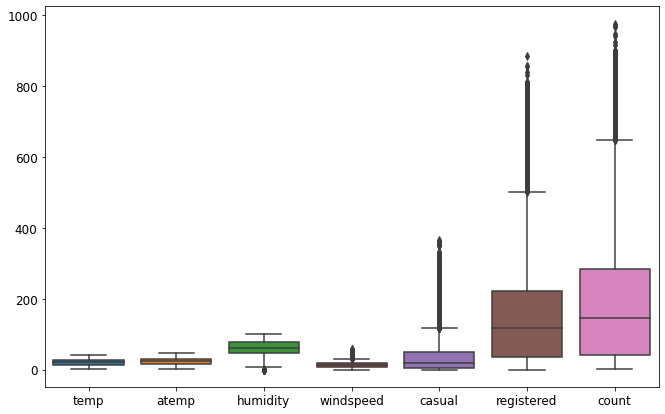

In [74]:
plt.figure(figsize=(11,7))
sns.boxplot (data = data[var_cont])

Quelques Obervations:

* Nous observons les valeurs abérantes sur les features **casual**, **registered**, **count**. Npus verons l'impact de ces dernières sur le model

In [75]:
# Rentrons dans le détail en visualisant les variables continues et leur rapport au nombre de locations

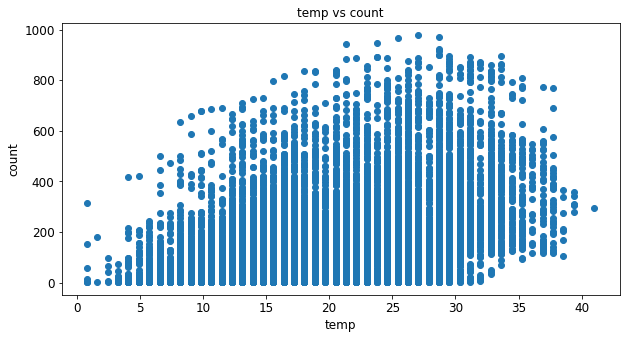

In [76]:
plt.figure(figsize=(10,5))
plt.scatter(data['temp'], data['count'])
plt.title('temp vs count')
plt.xlabel('temp')
plt.ylabel('count')
plt.show()

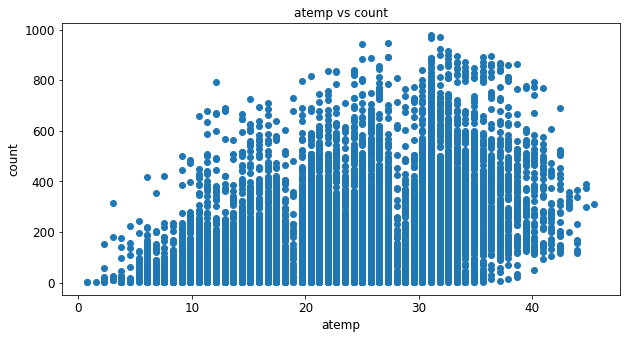

In [77]:
plt.figure(figsize=(10,5))
plt.scatter(data['atemp'], data['count'])
plt.title('atemp vs count')
plt.xlabel('atemp')
plt.ylabel('count')
plt.show()

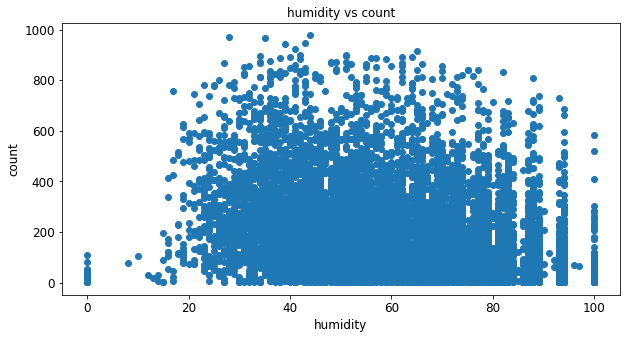

In [78]:
plt.figure(figsize=(10,5))
plt.scatter(data['humidity'], data['count'])
plt.title('humidity vs count')
plt.xlabel('humidity')
plt.ylabel('count')
plt.show()

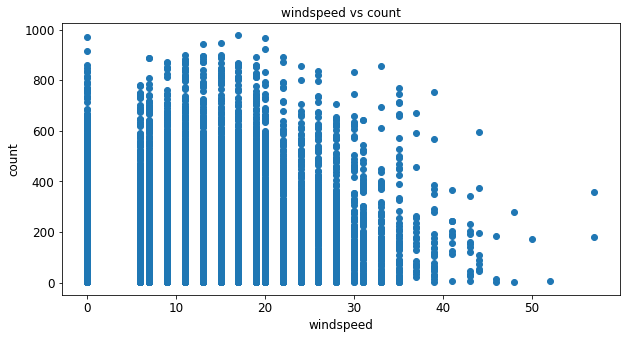

In [79]:
plt.figure(figsize=(10,5))
plt.scatter(data['windspeed'], data['count'])
plt.title('windspeed vs count')
plt.xlabel('windspeed')
plt.ylabel('count')
plt.show()

* Il va de soit que lorsque la vitesse du vent est importante le nombre de locations est faible

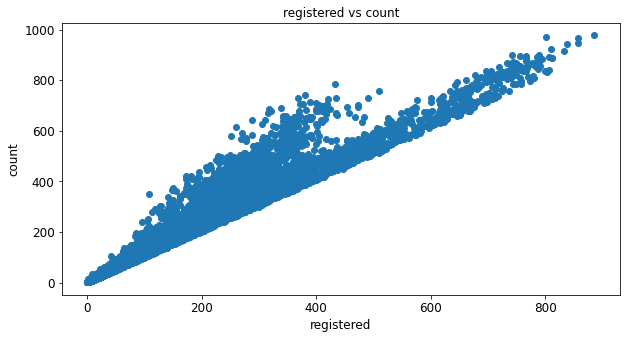

In [80]:
plt.figure(figsize=(10,5))
plt.scatter(data['registered'], data['count'])
plt.title('registered vs count')
plt.xlabel('registered')
plt.ylabel('count')
plt.show()

* On constate une forte corrélation entre le nombre de location des utilisateurs enrégistrés et le nombre total de location.
Rien de plus normal

In [81]:
#Analysons la corrélation entre les différents features
corr_matrix = data.corr()
corr_matrix['count'].sort_values(ascending=False)

count         1.000000
registered    0.970948
casual        0.690414
temp          0.394454
atemp         0.389784
season        0.163439
windspeed     0.101369
workingday    0.011594
holiday      -0.005393
weather      -0.128655
humidity     -0.317371
Name: count, dtype: float64

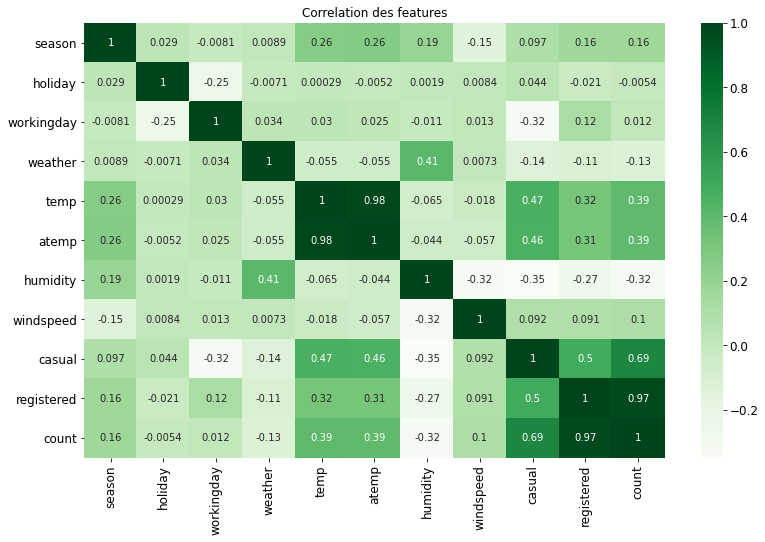

In [82]:
#Graphique ça donne?
plt.figure(figsize=(13,8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title('Correlation des features')
plt.show()

Remarques?
* Il existe beaucoup de variables fortement correlées negativement avec la variable cible (**holiday**, **weather**, **humidity**)
* Sans surprise les variables **registered** et **casual** sont fortement correlées avec la variable cible
* la feature **atemp** et **temp** sont corrélés entre elles
* l'humidité et le nombre total de location de location sont inversement liées.
* Même constat sur la méteo. Et si l'on se refère au graphe ci dessus, plus les conditions météorologiques sont mauvaises moins nous les vélos sont loués

## Feauture engeneering

In [83]:
# Nous allons à présent encoder nos varaibles de catégorisation de type catégorielle
# var_cat =['season', 'holiday', 'workingday', 'weather']
# Les variables 'holiday et 'workingday' ont deux modalités, nous allons nous contater de transformer les variables 
# season et weather

In [84]:
# Traitement des variables season et weather
weather = pd.get_dummies(data['weather'], prefix='weather')
season = pd.get_dummies(data['season'],prefix='season')

data = pd.concat([data, weather], axis=1)
data = pd.concat([data, season], axis=1)

data = data.drop(['weather', 'season'], axis=1)
data.head()


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,1,0,0,0,1,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,1,0,0,0,1,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,1,0,0,0,1,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,1,0,0,0,1,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,1,0,0,0,1,0,0,0


In [85]:
#Attaquons à présent à la feature datetime
temp = pd.DatetimeIndex(data['datetime'])
data['hour'] = temp.hour
data['dayofweek'] = temp.dayofweek
data['month'] = temp.month
data['year'] = temp.year
data['year'] = data['year'].map({2011:0, 2012:1})

#Suppression de datetime
data = data.drop(['datetime'], axis=1)

data.head()


,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,weather_1,...,weather_3,weather_4,season_1,season_2,season_3,season_4,hour,dayofweek,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,4,5,1,0


In [86]:
# Nous pouvons à nouveau visualiser notre jeu de données graphiquement


Text(0.5, 1.0, ' hour vs count during holiday')

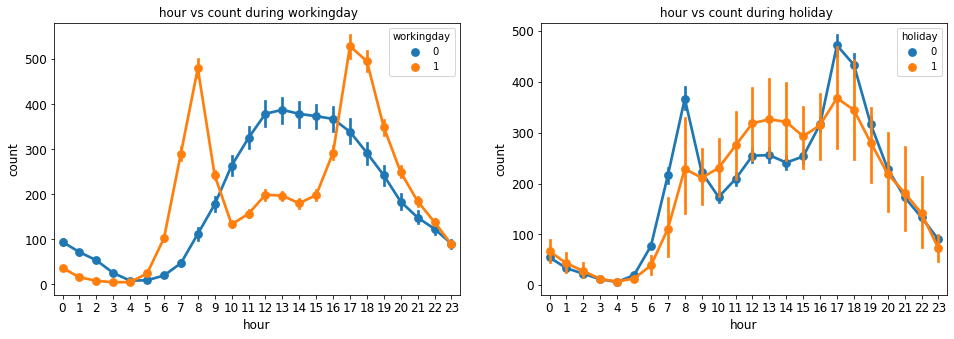

In [87]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.pointplot(x='hour', y='count', hue='workingday', data=data)
plt.title(' hour vs count during workingday')

plt.subplot(122)
sns.pointplot(x='hour', y='count', hue='holiday', data=data)
plt.title(' hour vs count during holiday')

**Remarques:**
* Durant les jours de travail on observe un pique de location de vélos aux heures de pointe( le Matin pour aller au boulot et le soir au retour) et ceci inversement durant le weekend
* Même constat lorsqu'on est pas en vaccances aux heures de pointes, cependant les courbles se chevauchent légèrement.

Text(0.5, 1.0, ' hour vs count during holiday')

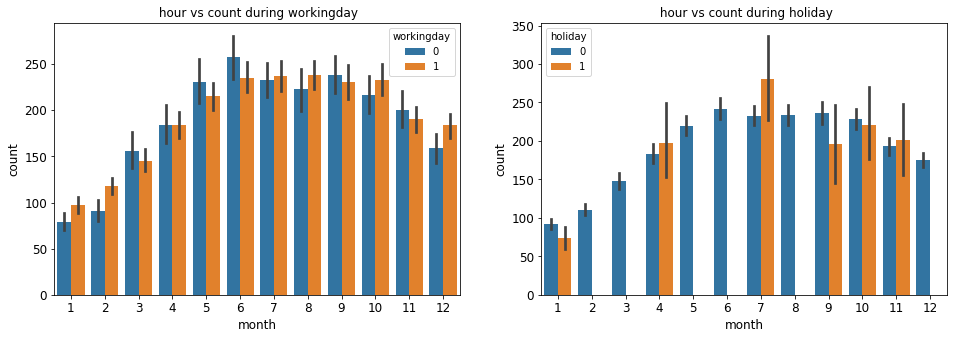

In [88]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(x='month', y='count', hue='workingday', data=data)
plt.title(' hour vs count during workingday')

plt.subplot(122)
sns.barplot(x='month', y='count', hue='holiday', data=data)
plt.title(' hour vs count during holiday')

**Remarques:**
* Alors il sérait intéressant de se pencher sur la figure de droite et de constater que pendant les vaccances il y'a pratiquement pas location de vélos. ce quiq ans le fond n'est pas tout à fait anormal. Mais on pourrait aussi se poser la question l'origine des données afin de mieux comprendre cette absence durant certains mois

Text(0.5, 1.0, ' year vs count during holiday')

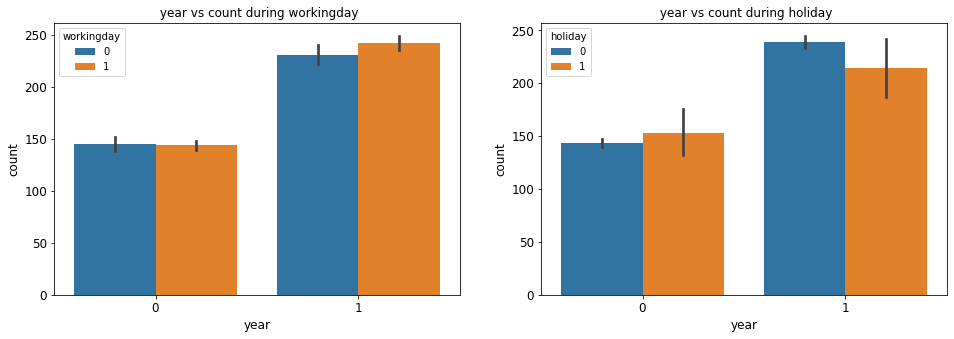

In [89]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.barplot(x='year', y='count', hue='workingday', data=data)
plt.title(' year vs count during workingday')

plt.subplot(122)
sns.barplot(x='year', y='count', hue='holiday', data=data)
plt.title(' year vs count during holiday')

**Remarques:**
* On constate une nette augmentation du nombre de vélos loués durant l'année 2012 et ce quelque soit la periode: Vaccance ou jour de travail

## Selection et entrainement des modèles

In [90]:
# Divisons notre modèle en variables de train et test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( data.drop(['count'], axis=1), data['count'], test_size=0.2, random_state=42)

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import cross_val_score, GridSearchCV

Etant donné que la variable à expliquer est une valeur réelle continue, nous allons utiliser une métrique d'évaluation des modèles de regression à l'occurence la métrique **mean_squared_error**. Cependant il existe d'autres métriques à l'instar de: **neg_mean_absolute_error**, **mean_squared_log_error**

In [92]:
model_name = ['LinearRegression', 'DecisionTree', 'RandomForestRegressor', 'SVR']
models = [  
            LinearRegression(), 
            DecisionTreeRegressor(),
            RandomForestRegressor(n_estimators=100, random_state=42), 
            SVR(kernel="linear")
         ]
rmse = []
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    rmse.append( np.sqrt(mean_squared_error(y_train, y_pred)) )

dictionnary = {
        'models': model_name,
        'RMSE':rmse  
}
 
RMSE = pd.DataFrame(dictionnary)
RMSE.sort_values('RMSE')

,models,RMSE
1,DecisionTree,0.000000e+00
0,LinearRegression,7.100771e-13
3,SVR,6.470653e-02
2,RandomForestRegressor,1.226058e+00


**Remarques:**
* Le meilleur modèle au vu cet apprentissage est l'abre de Decision, Vérifions cela à l'aide d'une validation croisée

## Amélioration de l'évaluation à l'aide de la validation croisée

In [93]:
rmse_cross_val = []
for model in models:
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse_scores = np.sqrt(-scores.mean())
    rmse_cross_val.append(rmse_scores)

dictionnary = {
        'models': model_name,
        'RMSE':rmse_cross_val  
}
 
RMSE = pd.DataFrame(dictionnary)
RMSE.sort_values('RMSE')

,models,RMSE
0,LinearRegression,5.586944e-13
3,SVR,6.115224e-02
2,RandomForestRegressor,3.787521e+00
1,DecisionTree,7.183741e+00


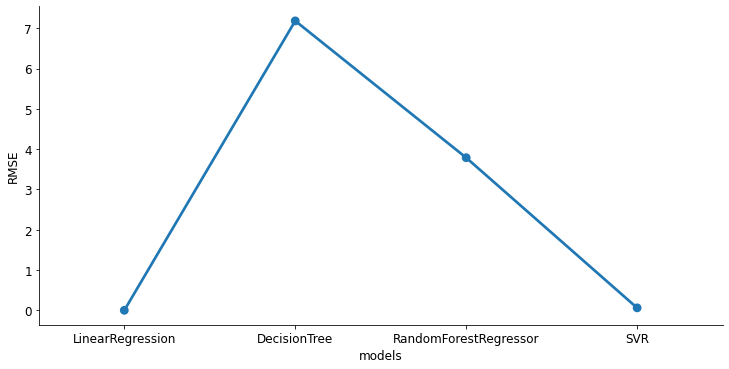

In [95]:
sns.factorplot(x='models',y='RMSE',data=RMSE, kind='point',size=5,aspect=2)

Après validation croisée, On constate l'arbre de décision n'est plus aussi efficace, il est desormais le moins bon parmi nos modèles. Et si nous règlons d'avantage nos algorithmes afin d'optimser les hyperparamètres

## Règlarage de la precision du modèle
Nous allons optimiser les trois meilleurs modèles:
* LinearRegression
* SVR	
* RandomForestRegressor

In [111]:
## Regression linéaire
RMSE_SCORE = []
model_final = ['LinearRegression', 'SVR', 'RandomForestRegresso']
param_grid = {
                'fit_intercept':[True,False], 
                'normalize':[True,False], 
                'copy_X':[True, False]
             }
lin_reg = LinearRegression()
grid_search_lin = GridSearchCV(lin_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lin.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             scoring='neg_mean_squared_error')

In [112]:
grid_search_lin.best_params_

{'copy_X': True, 'fit_intercept': False, 'normalize': True}

In [114]:
grid_search_lin.best_estimator_

LinearRegression(fit_intercept=False, normalize=True)

In [115]:
rmse_lin = np.sqrt(-grid_search_lin.best_score_)
RMSE_SCORE.append(rmse_lin)

In [116]:
# Random Forest
param_grid = [
               {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
               {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
             ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search_for = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search_for.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [117]:
grid_search_for.best_params_

{'max_features': 8, 'n_estimators': 30}

In [118]:
grid_search_for.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [119]:
rmse_forest = np.sqrt(-grid_search_for.best_score_)
RMSE_SCORE.append(rmse_forest)

In [120]:
#SVR
param_grid = [
               {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000.]},
             ]

svm_reg = SVR()
grid_search_svr = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search_svr.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ............................ C=10.0, kernel=linear, total=   0.6s
[CV] C=10.0, kernel=linear ...........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ............................ C=10.0, kernel=linear, total=   0.8s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   0.5s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   1.0s
[CV] C=10.0, kernel=linear ...........................................
[CV] ............................ C=10.0, kernel=linear, total=   1.0s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.6s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.7s
[CV] C=30.0, kernel=linear ...........................................
[CV] ............................ C=30.0, kernel=linear, total=   0.5s
[CV] C=30.0, kernel=linear ...........................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   18.3s finished


GridSearchCV(cv=5, estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0, 100.0, 300.0, 1000.0],
                          'kernel': ['linear']}],
             scoring='neg_mean_squared_error', verbose=2)

In [121]:
grid_search_svr.best_params_

{'C': 10.0, 'kernel': 'linear'}

In [122]:
grid_search_svr.best_estimator_

SVR(C=10.0, kernel='linear')

In [123]:
rmse_svc = np.sqrt(-grid_search_svr.best_score_)
RMSE_SCORE.append(rmse_svc)

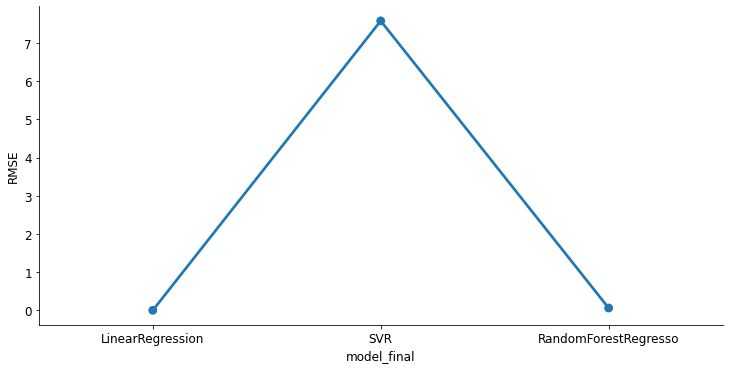

In [124]:
dictionnary = {
        'model_final': model_final,
        'RMSE':RMSE_SCORE  
}
 
RMSE = pd.DataFrame(dictionnary)
sns.factorplot(x='model_final',y='RMSE',data=RMSE, kind='point',size=5, aspect=2)

Magnifique! Une fois les hyperparamètres optimisés, l'algorithme de regression linéaire demeure le meilleure mais on s'apercoit que les forêts aléatoires sur rapprochement en termes de performances.
Elle n'est pas belle la Data Science?

## Evaluation sur le jeu de Test

In [130]:
all_model = [grid_search_lin, grid_search_for, grid_search_svr]

final_RMSE_test = []
final_RMSE_train = []

for final_model in all_model:
    model = final_model.best_estimator_
    
    final_pred_train = model.predict(X_train)
    final_rmse_train = np.sqrt(mean_squared_error(y_train, final_pred_train))
    final_RMSE_train.append(final_rmse_train)
    
    final_pred_test = model.predict(X_test)
    final_rmse_test = np.sqrt(mean_squared_error(y_test, final_pred_test))
    final_RMSE_test.append(final_rmse_test)

final_RMSE_train

[2.0614038763166527e-13, 3.1382513154364102, 0.0647065346974856]

In [131]:
final_RMSE_train

[2.0500727395438466e-13, 6.828787822758312, 0.0646038169546288]

In [139]:
dictionnary = {
        'model_final': model_final,
        'RMSE_train':final_RMSE_train,
        'RMSE_test':final_RMSE_train,
}
pd.DataFrame(dictionnary)

,model_final,RMSE_train,RMSE_test
0,LinearRegression,2.061404e-13,2.061404e-13
1,SVR,3.138251e+00,3.138251e+00
2,RandomForestRegresso,6.470653e-02,6.470653e-02


**Conclusion:**
Le modèle de regression linéaire reste le meilleur modèle pour ce problème

## Mise en place d'un pipeline